In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
from sklearn import metrics, linear_model
import pandas as pd

In [2]:
ls data/

binMNIST.mat*        bindigit_tst.csv*    targetdigit_tst.csv*
bindigit_trn.csv*    targetdigit_trn.csv*


In [3]:
bin_train = np.genfromtxt('data/bindigit_trn.csv',delimiter=',',)
target_train = np.genfromtxt('data/targetdigit_trn.csv',delimiter=',',)
bin_test = np.genfromtxt('data/bindigit_tst.csv',delimiter=',',)
target_test = np.genfromtxt('data/targetdigit_tst.csv',delimiter=',',)

In [14]:
BernoulliRBM?

In [4]:
hidden_nodes = 50
batch_size = 50
learning_rate = 0.01
iterations = 10

In [5]:
class RBM(BernoulliRBM):
    def reconstruct(self, X):
        inner = np.dot(np.dot(self.components_.T, self.components_),X.T).T
        recon = inner / inner.max(axis=0)
        return recon
    

In [6]:
rbm = RBM(n_components = hidden_nodes, batch_size = batch_size, learning_rate = learning_rate,
                  n_iter = iterations, verbose = True, random_state = 0)

#logistic = linear_model.LogisticRegression()

#pipe = Pipeline(steps=[('rbm', RBM), ])

In [7]:
rbm.fit(bin_train)

[RBM] Iteration 1, pseudo-likelihood = -172.42, time = 0.46s
[RBM] Iteration 2, pseudo-likelihood = -151.61, time = 0.58s
[RBM] Iteration 3, pseudo-likelihood = -139.39, time = 0.56s
[RBM] Iteration 4, pseudo-likelihood = -134.60, time = 0.55s
[RBM] Iteration 5, pseudo-likelihood = -130.23, time = 0.53s
[RBM] Iteration 6, pseudo-likelihood = -127.65, time = 0.53s
[RBM] Iteration 7, pseudo-likelihood = -124.63, time = 0.53s
[RBM] Iteration 8, pseudo-likelihood = -122.65, time = 0.54s
[RBM] Iteration 9, pseudo-likelihood = -121.27, time = 0.53s
[RBM] Iteration 10, pseudo-likelihood = -119.33, time = 0.53s


RBM(batch_size=50, learning_rate=0.1, n_components=50, n_iter=10,
  random_state=0, verbose=True)

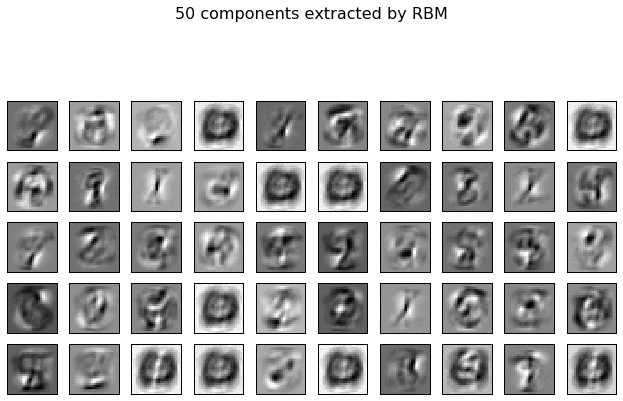

In [9]:
bin_train.shape

(8000, 784)

In [25]:
recon_train = rbm.reconstruct(bin_train)

In [26]:
def show_image(X):
    plt.imshow(X.reshape((28, 28)), cmap=plt.cm.gray_r,
               interpolation='nearest')
    plt.show()

In [27]:
#Compute mean error
def calculate_error(data, recon_data):
    return np.average(np.absolute(data-recon_data))

In [29]:
error = calculate_error(bin_train, recon_train)

In [133]:
def gen_3_1_solution(hidden_nodes, learning_rate, recon = "skipped"):
    if recon == "skipped":
        errors = []
        rbm.verbose = False
        rbm.n_components = hidden_nodes
        rbm.learning_rate = learning_rate
        for i in range(iterations):
            rbm.n_iter = i
            rbm.fit(bin_train)
            recon = rbm.reconstruct(bin_train)
            errors.append(calculate_error(bin_train, recon))
            print("finished loop #{}".format(i+1))
        plt.plot(errors)
        plt.title("Error per iteration, {} hidden nodes, {} learning rate".format(hidden_nodes, learning_rate))
        plt.show()
    plt.figure(figsize = (20,10))
    for j in range(1,10):
        index = np.where(target_train==j)[0][0]
        
        # Plot original
        plt.subplot(10, 2, j*2-1)
        plt.imshow(bin_train[index,:].reshape((28, 28)), cmap=plt.cm.gray_r,
           interpolation='nearest')
        plt.xticks(())
        plt.yticks(())
        
        plt.subplot(10, 2, j*2)
        #Plot reconstruction
        plt.imshow(recon[index,:].reshape((28, 28)), cmap=plt.cm.gray_r,
           interpolation='nearest')
        plt.xticks(())
        plt.yticks(())
    plt.suptitle("original vs reconstruction".format(j))
    plt.subplots_adjust(left = 0.125, right = 0.175, wspace = 0, hspace = 0)
    
    plt.figure(figsize=(10.2, 10))
    for i, comp in enumerate(rbm.components_):
        plt.subplot(10, 10, i + 1)
        plt.imshow(comp.reshape((28, 28)), cmap=plt.cm.gray_r,
                   interpolation='nearest')
        plt.xticks(())
        plt.yticks(())
    plt.suptitle('50 components extracted by RBM', fontsize=16)
    plt.subplots_adjust(0.08, 0.02, 0.92, 0.85, 0.08, 0.23)
    return recon

finished loop #1
finished loop #2
finished loop #3
finished loop #4
finished loop #5
finished loop #6
finished loop #7
finished loop #8
finished loop #9
finished loop #10


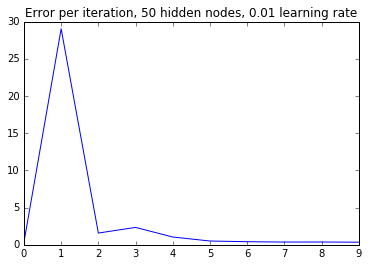

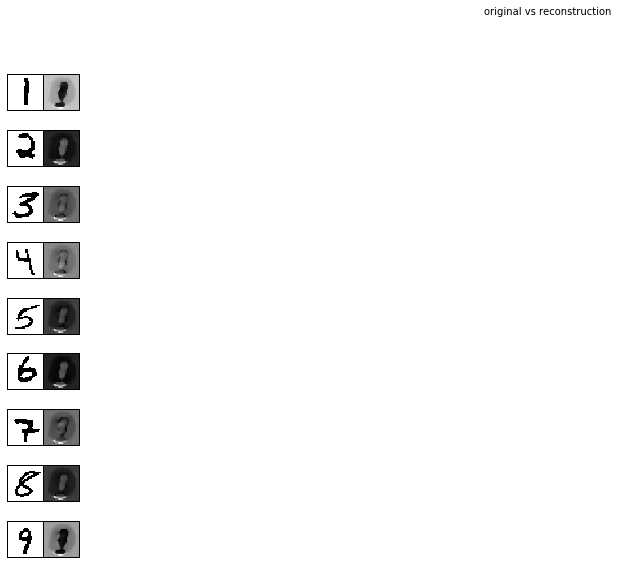

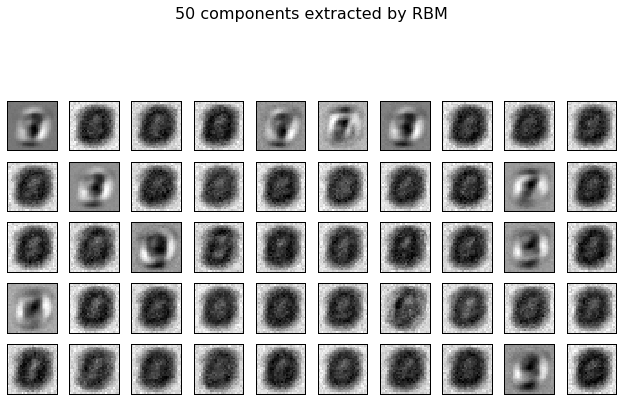

In [134]:
recon = gen_3_1_solution(hidden_nodes = 50, learning_rate = 0.01)